In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc,roc_curve,precision_recall_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
data = pd.read_csv('../train_data.csv')

In [3]:
data

,id,age,country_destination,post_checkout_action,p5,pending,create_listing,manage_listing,message_to_host_change,listing_descriptions,...,day_account_created_29,day_account_created_30,day_account_created_31,weekday_account_created_0,weekday_account_created_1,weekday_account_created_2,weekday_account_created_3,weekday_account_created_4,weekday_account_created_5,weekday_account_created_6
0,d1mm9tcy42,62.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,yo8nz8bqcq,37.440629,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4grx6yxeby,37.440629,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,ncf87guaf0,37.440629,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4rvqpxoh3h,37.440629,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64128,zxodksqpep,32.000000,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
64129,mhewnxesx9,37.440629,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
64130,6o3arsjbb4,32.000000,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
64131,jh95kwisub,37.440629,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [4]:
X = data.drop(['id','country_destination'],axis=1)
y = data['country_destination']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
model_names = ['Decision Tree', 'Random Forest', 'AdaBoostClassifier']
classifiers = [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
 
param_dc = {'max_features':['auto','sqrt','log2',None],'max_depth':range(5,30,5)}
param_rc = {'n_estimators':range(5,20,5),'max_features':['auto','sqrt','log2',None],'max_depth':range(5,30,5)}
param_ac = {'n_estimators':range(5,20,5),'learning_rate':[0.01,0.1,1,10]}   
        
param_grid = [param_dc, param_rc, param_ac]
 
scoring = {'roc_auc':'roc_auc','accuracy':'accuracy', 'precision':'precision','recall':'recall','f1':'f1'}

In [22]:
def gird_search_model(classifier,param,name,x_train,y_train,x_test,y_test): 
    model = GridSearchCV(classifier,param,cv=5,verbose=5,scoring=scoring,refit='roc_auc',n_jobs=-1,return_train_score=True) 
    model_fit = model.fit(scaled_X_train,y_train) 
    train_predictions = model_fit.best_estimator_.predict(scaled_X_train) 
    test_predictions = model_fit.best_estimator_.predict(scaled_X_test)

    print('MODEL : %r' % name)
    print('Best cv_test_roc_auc: %f using %s' % (model_fit.best_score_,model_fit.best_params_))
    
    
    train_score_list = []
    test_score_list = []
    score_list = []
    metrics_name = [accuracy_score,precision_score,recall_score,f1_score,roc_auc_score]
    for matrix in metrics_name:
        train_score = matrix(y_train,train_predictions)
        test_score = matrix(y_test,test_predictions)
        train_score_list.append(train_score)
        test_score_list.append(test_score)
    score_list.append(train_score_list)
    score_list.append(test_score_list) 
    score_df = pd.DataFrame(score_list,columns = ['accuracy','precision','recall','f1','roc_auc'], index = ['train','test'])
    print(score_df) 

    return score_list,train_predictions,test_predictions

In [23]:
train_score_list = []
test_score_list = []
train_predictions_list = []
test_predictions_list = []
for classifier,param,name in zip(classifiers,param_grid,model_names):
    score_list,train_predictions,test_predictions =  gird_search_model(classifier,param,name,scaled_X_train,y_train,scaled_X_test,y_test) 
    score_list.append(score_list)
    train_score_list.append(score_list[0])
    test_score_list.append(score_list[1])
    train_predictions_list.append(train_predictions)
    test_predictions_list.append(test_predictions)
    print('-------------------------------------------------------------------------------------------------------------------------------')
    

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:   10.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished


MODEL : 'Decision Tree'
Best cv_test_roc_auc: 0.815188 using {'max_depth': 5, 'max_features': None}
       accuracy  precision    recall        f1   roc_auc
train  0.768672   0.718660  0.646294  0.680559  0.745190
test   0.769878   0.722171  0.642916  0.680243  0.745426
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


MODEL : 'Random Forest'
Best cv_test_roc_auc: 0.824123 using {'max_depth': 10, 'max_features': None, 'n_estimators': 15}
       accuracy  precision    recall        f1   roc_auc
train  0.781510   0.722002  0.694279  0.707869  0.764772
test   0.771282   0.709677  0.675676  0.692259  0.752868
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:   28.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   31.1s finished


MODEL : 'AdaBoostClassifier'
Best cv_test_roc_auc: 0.820466 using {'learning_rate': 1, 'n_estimators': 15}
       accuracy  precision    recall        f1   roc_auc
train  0.762747   0.726081  0.606580  0.660972  0.732781
test   0.763018   0.727992  0.602785  0.659498  0.732158
-------------------------------------------------------------------------------------------------------------------------------


In [16]:
def plot_roc_curve(roc,fpr,tpr,name):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--',label='ROC curve (area = %0.2f)' % roc)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(name + ': ROC curve')
    plt.legend(loc='best')
    plt.show()

In [17]:
def plot_precision_recall_curve(pr,recall,precision,name):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--',label='ROC curve (area = %0.2f)' % pr)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(name + ': Precision recall curve')
    plt.legend(loc='best')
    plt.show()

In [18]:
def plot_curve(y_test,y_pred,name):
    fpr, tpr, thresholds1 = roc_curve(y_test,y_pred)
    precision, recall, thresholds2 = precision_recall_curve(y_test,y_pred)
    roc = auc(fpr, tpr)
    pr = auc(recall,precision) 

    plot_roc_curve(roc,fpr,tpr,name)
    print()
    plot_precision_recall_curve(pr,recall,precision,name)

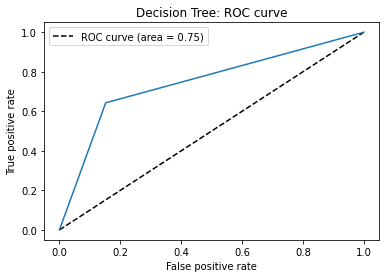

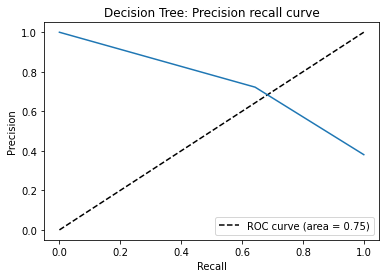

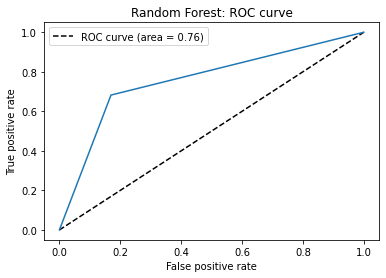

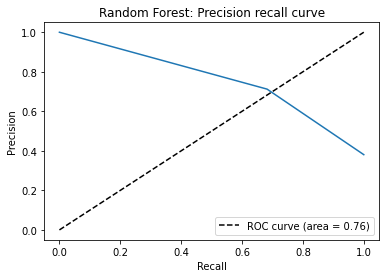

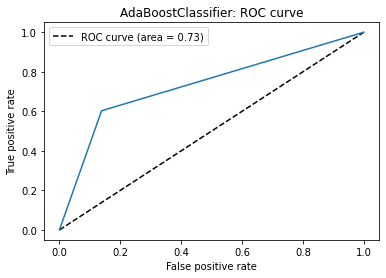

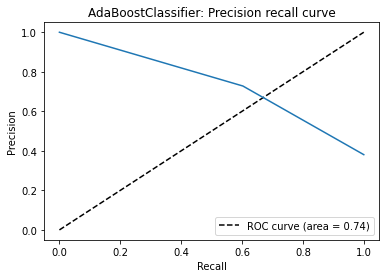

In [19]:
for name,y_pred in zip(model_names,predictions_list):
    plot_curve(y_test,y_pred,name)